# **People Analytics.**

## Introducción. (oreillys)

## Predecir la probabilidad de que un candidato busque un nuevo trabajo.


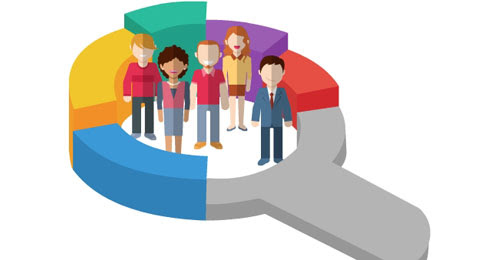

Una empresa activa en Big Data y Data Science quiere contratar científicos de datos entre las personas que superan con éxito algunos cursos que imparte la empresa. Mucha gente se apunta a su formación. La empresa quiere saber cuáles de estos candidatos realmente quieren trabajar para la empresa después de la formación o buscaran un nuevo empleo porque ésto ayuda a reducir  costes y  tiempo, así como la calidad de la formación o la planificación de los cursos y la categorización de los candidatos. La información relacionada con la demografía, la educación y la experiencia está en manos de Recursos Humanos y la inscripción de los candidatos.

Este conjunto de datos está diseñado para comprender los factores que llevan a una persona a dejar su trabajo actual para dedicarse también a investigaciones de recursos humanos. Por modelo (s) que utiliza las credenciales actuales, datos demográficos y datos de experiencia, podrá predecir la probabilidad de que un candidato busque un nuevo trabajo o trabaje para la empresa, además de interpretar los factores afectados en la decisión del empleado.

* Nos encontramos ante un problema de Clasificación.
* Desafios de este Conjunto de datos :
  * El conjunto de datos está desequilibrado.
  * La mayoría de las características son categóricas (nominal, ordinal, binaria).
  * La imputación faltante.

**Objetivo**

Predecir la probabilidad de que un candidato trabaje para la empresa, despues de la formación o busque un nuevo trabajo.
Interpretar el (los) modelo (s) de tal manera que ilustre qué características afectan la decisión del candidato
Consulte la siguiente tarea para obtener más detalles:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015.


**objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

  0 – Not looking for job change,
  
  1 – Looking for a job change.



**Es *texto en cursiva* mejor que primero evalúe su (s) modelo (s) con su estrategia seleccionada (KFold CV, hold_ out,…) y luego prediga la prueba (sample_submission) y finalmente compare el resultado con los valores objetivo de prueba y averigüe el rendimiento de su modelo sobre datos no vistos y la aptitud de su modelo.
La canalización que solicite para obtener resultados (EDA, preprocesamiento, ingeniería y selección de características, creación de modelos y estrategia de evaluación, etc.) será evaluada por el rendimiento de su modelo en datos no vistos (aug_test.csv**

In [1]:
# Importamos Librerias.

# data analysis and wrangling
import pandas as pd
import numpy as np
import random 

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip /content/RRHH_Proyecto_final.zip

Archive:  /content/RRHH_Proyecto_final.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [3]:
# Load dataset train 
df = pd.read_csv('aug_train.csv')


In [4]:
df.head()# vemos el encabezado de este dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.sort_values(["enrollee_id"])# comprobamos que en esta variable faltan valores.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
6730,2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
10024,4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
15817,5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
4552,7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0


In [6]:
# eliminamos la columna enrolle_id ya que no nos aporta ningun valor y faltan algunos valores .
df.drop(["enrollee_id"], axis = 'columns', inplace=True)


In [7]:
df.columns # vemos el nombre de las columnas de este dataset.

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

**Features**

* enrollee_id : ID único del candidato.

* city: código de ciudad.

* city_ development _index :  índice de desarrollo de la ciudad (escalado).

* gender: género del candidato.

* relevent_experience: experiencia relevante del candidato.

* enrolled_university: tipo de curso universitario inscrito, si lo hubiera.

* education_level: nivel de educación del candidato.

* major_discipline :disciplina principal de educación del candidato.

* experience: Experiencia total del candidato en años.

* company_size: Número de empleados en la empresa del empleador actual

* company_type : tipo de empleador actual.

* lastnewjob: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.

* training_hours: horas de formación completadas.

* target: 0 - No busca un cambio de trabajo, 1 - Busca un cambio de trabajo.



In [8]:
df.info()# información básica del dataset, tipos de datos y columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [9]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 19158 Rows
Dataset has 13 Cols


In [10]:
# Comprobamos si hay alguna fila duplicada y en su caso las eliminamos.
df.duplicated().sum()


49

In [11]:
df = df.drop_duplicates()

In [12]:
 # Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64


# **EDA**

**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

   0 - No busco cambio de trabajo,
  
   1 - Buscando un cambio de trabajo.

Tenga en cuenta que el conjunto de datos no está equilibrado en la variable.

El 75% de los inscritos no parecía un cambio de trabajo

25% de los inscritos buscan un cambio de trabajo


0.0    0.750641
1.0    0.249359
Name: target, dtype: float64


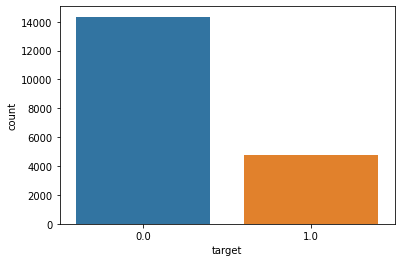

In [13]:
# Visualizamos variable objetivo.
sns.countplot(x=df['target']);
print(df.target.value_counts(normalize=True))

##  Visualizamos Y procesamos Missing values.

In [14]:
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2809
experience                  65
company_size              5920
company_type              6122
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
# Para poder comprobar a nivel global los valores nulos
df.isnull().sum()/len(df)*100 # observamos por valor relativo

city                       0.000000
city_development_index     0.000000
gender                    23.590978
relevent_experience        0.000000
enrolled_university        2.019991
education_level            2.407243
major_discipline          14.699880
experience                 0.340154
company_size              30.980166
company_type              32.037260
last_new_job               2.213617
training_hours             0.000000
target                     0.000000
dtype: float64

### Hacemos limpieza de las columnas con datos missing más alto( gender, mayor_discipline, company_size, company_type).


### Gender.

Text(0, 0.5, 'Número')

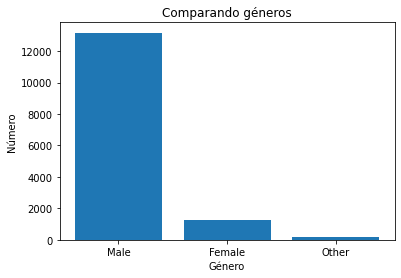

In [16]:
# VISUALIZAMOS LA COLUMNA GENERO.
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['gender'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Comparando géneros') 
ax.set_xlabel('Género') 
ax.set_ylabel('Número')


In [17]:
# Trabajamos con los valores nulos de esta columna.
df['gender'].value_counts()

Male      13173
Female     1237
Other       191
Name: gender, dtype: int64

In [18]:
df['gender'].isna().sum()

4508

In [19]:
# Rellenamos los valores Nan de la columna gender con valores aleatorios masculinos, femeninos a la vez.

from random import choice

mask = df["gender"].isna()

df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["Male","Female"]))

In [20]:
# como vemos nos quedan todavia algunos valores "Other".
df['gender'].value_counts()

Male      15389
Female     3529
Other       191
Name: gender, dtype: int64

In [21]:
df['gender'].isna().sum()

0

In [22]:
# Stack over flow. OTHER. REEMPLAZARLOS POR VALORES ALEATORIOS.

In [23]:
#Get names of indexes for which column Gender  has value Other
indexNames = df[ df['gender'] == 'Other' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)


In [24]:
df['gender'].value_counts()

Male      15389
Female     3529
Name: gender, dtype: int64

### Mayor_discipline.

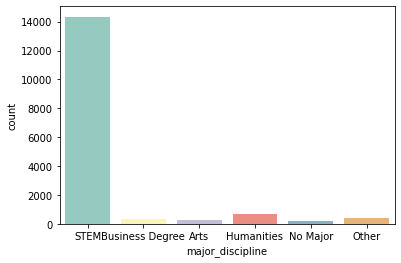

In [25]:
# Visualizamos los datos de esta feature.
sns.countplot(x=df.major_discipline, palette="Set3")

In [26]:
# Tratamos los valores Nulos de esta features.
df['major_discipline'].isna().sum()

2761

In [27]:
# Rellenamos los valores NAN de esta columna con la Moda, ya que como podemos ver STEM es el valor que mas se repite con diferencia. Los otros valores son muy minoritarios.
df['major_discipline'].fillna(df['major_discipline'].mode()[0],inplace=True)

In [28]:
#Comprobamos que ya no hay valores nulos en esta columna.
df['major_discipline'].isna().sum()

0

### Company_size.

In [29]:
# comprobamos los valores de esta variable.
df['company_size'].value_counts()
# Company Size is measured as a categorical variable with values(<10, 10/49, 50-99, 100-500, 500-999, 1000-4999, 5000-9999, 1000+).
# Most companies in the data set are between 50 and 99 people.

50-99        3049
100-500      2548
10000+       1987
10/49        1458
1000-4999    1309
<10          1297
500-999       872
5000-9999     557
Name: company_size, dtype: int64

In [30]:
df['company_size'].isna().sum()

5841

In [31]:
# reemplazo los valores de esta variable, en vez de por intervalo por lA MEDIA DE Los trabajadores en cada interval de agrupación.
#df['company_size'] = df.company_size.replace({'50-99':75,"<10":10,"10000+":10000,"5000-9999": 7500,"1000-4999":2500,"10/49":25,"100-500":300,"500-999":750})


In [32]:
# comprobamos los valores sde esta variable.
df['company_size'].value_counts()
# Company Size is measured as a categorical variable with values(<10, 10/49, 50-99, 100-500, 500-999, 1000-4999, 5000-9999, 1000+).
# Most companies in the data set are between 50 and 99 people.

50-99        3049
100-500      2548
10000+       1987
10/49        1458
1000-4999    1309
<10          1297
500-999       872
5000-9999     557
Name: company_size, dtype: int64

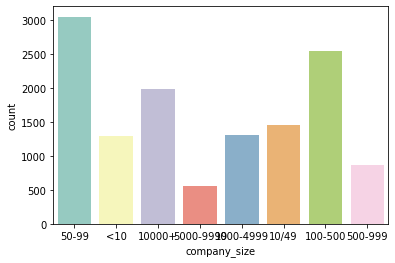

In [33]:
sns.countplot(x=df.company_size, palette="Set3")

In [34]:
# Rellenamos los valores NAN de esta columna copiando los valores de la celda anterior y posterior.
df['company_size'].fillna(method='ffill', limit=1, inplace=True)
df['company_size'].fillna(method='bfill', limit=1, inplace=True)

In [35]:
df['company_size'].isna().sum()# Hemos conseguido eliminar gran cantidad de valores nulos,

529

### Company Type

In [36]:
# df.groupby(['company_type']).count()

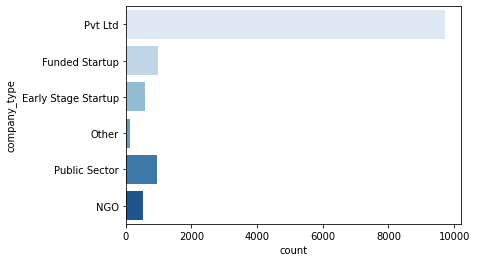

In [37]:
sns.countplot(y= df['company_type'], palette="Blues") # invertimos el eje
# Sociedad de responsabilidad limitada (Private limited company)


In [38]:
# Rellenamos los valores NAN de esta columna con la Moda.
df['company_type'].fillna(df['company_type'].mode()[0],inplace=True)

In [39]:
# Para poder comprobar a nivel global los valores nulos
df.isnull().sum()/len(df)*100 # observamos por valor relativo

city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       1.971667
education_level           2.383973
major_discipline          0.000000
experience                0.327730
company_size              2.796279
company_type              0.000000
last_new_job              2.235966
training_hours            0.000000
target                    0.000000
dtype: float64

In [40]:
# Eliminamos los pocos valores nulos que nos quedan.
df.dropna(inplace=True)

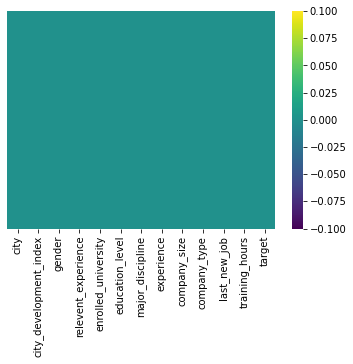

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")# comprobamos que ya no quedan valoes nulos.

In [42]:
df.shape

(17316, 13)

## **Exploración y visualización de datos.**

### City: código de ciudad.


In [43]:
df['city'].unique().tolist()# comprobamos los valores de esta variable.


['city_103',
 'city_40',
 'city_21',
 'city_162',
 'city_176',
 'city_160',
 'city_46',
 'city_61',
 'city_114',
 'city_13',
 'city_159',
 'city_102',
 'city_67',
 'city_100',
 'city_16',
 'city_104',
 'city_64',
 'city_101',
 'city_83',
 'city_105',
 'city_73',
 'city_75',
 'city_93',
 'city_11',
 'city_36',
 'city_20',
 'city_71',
 'city_57',
 'city_152',
 'city_19',
 'city_65',
 'city_74',
 'city_173',
 'city_136',
 'city_98',
 'city_97',
 'city_90',
 'city_50',
 'city_138',
 'city_82',
 'city_157',
 'city_89',
 'city_150',
 'city_175',
 'city_28',
 'city_115',
 'city_94',
 'city_59',
 'city_165',
 'city_145',
 'city_142',
 'city_26',
 'city_12',
 'city_37',
 'city_43',
 'city_116',
 'city_23',
 'city_99',
 'city_149',
 'city_10',
 'city_45',
 'city_41',
 'city_128',
 'city_70',
 'city_123',
 'city_7',
 'city_72',
 'city_106',
 'city_143',
 'city_78',
 'city_109',
 'city_24',
 'city_158',
 'city_48',
 'city_144',
 'city_91',
 'city_133',
 'city_126',
 'city_118',
 'city_134',
 'city

In [44]:
len(df['city'].unique().tolist())# tenemos sede en 123 ciudades.


123

In [45]:
# como es una columna que tiene demasiados valores y no tiene  información relevante , la eliminamos. La siguiente columna esta relacionada con la demografía y nos aporta más valor.
df.drop(['city'], axis=1,inplace=True)


### city_development_index : índice de desarrollo de la ciudad (escalado).

In [46]:
df['city_development_index'].unique().tolist()# comprobamos los valores de esta variable.


[0.92,
 0.7759999999999999,
 0.624,
 0.767,
 0.764,
 0.762,
 0.913,
 0.926,
 0.8270000000000001,
 0.843,
 0.804,
 0.855,
 0.887,
 0.91,
 0.924,
 0.6659999999999999,
 0.5579999999999999,
 0.923,
 0.794,
 0.754,
 0.939,
 0.865,
 0.55,
 0.893,
 0.7959999999999999,
 0.884,
 0.866,
 0.698,
 0.682,
 0.802,
 0.579,
 0.878,
 0.897,
 0.949,
 0.925,
 0.8959999999999999,
 0.836,
 0.693,
 0.769,
 0.789,
 0.775,
 0.903,
 0.555,
 0.727,
 0.64,
 0.516,
 0.743,
 0.899,
 0.915,
 0.6890000000000001,
 0.895,
 0.89,
 0.527,
 0.738,
 0.647,
 0.795,
 0.74,
 0.701,
 0.7659999999999999,
 0.493,
 0.84,
 0.691,
 0.742,
 0.479,
 0.722,
 0.921,
 0.848,
 0.856,
 0.898,
 0.83,
 0.73,
 0.68,
 0.725,
 0.448,
 0.763,
 0.745,
 0.7879999999999999,
 0.78,
 0.847,
 0.556,
 0.512,
 0.7390000000000001,
 0.563,
 0.518,
 0.8240000000000001,
 0.487,
 0.645,
 0.735,
 0.649,
 0.7809999999999999,
 0.625,
 0.807,
 0.664]

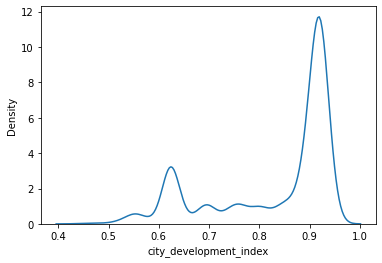

In [47]:
# comprobamos que el mayor numero de poblaciones tienes alrededor de un 90% de indice de desarrollo. Los indices de desarrollo van del 50% al 93 %. Alrededor del 60% también hay un repunte.
sns.kdeplot(data=df, x="city_development_index")# 


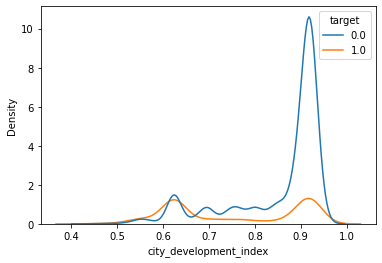

In [48]:
# Aquí podemos ver que las personas que viven en ciudades desarrolladas tienen una menor probabilidad de cambiar de trabajo.
sns.kdeplot(data=df, x="city_development_index", hue="target")


En el siguiente gráfico podemos ver que más personas de ciudades con un índice de desarrollo bajo están buscando un cambio de trabajo porque  están menos satisfechas con su trabajo actual.


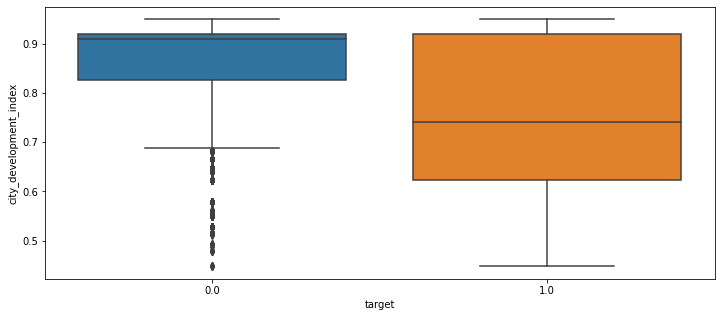

In [49]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='Looking for job'
ylabel = 'city_development_index'

### gender: género del candidato.


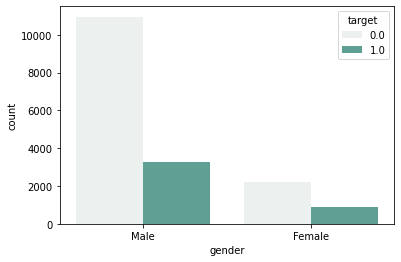

In [50]:
# Visualizamos la columna genero:  target: 0 – Not looking for job change, 1 – Looking for a job change.
# la mayoria de hombre, No buscan un nuevo trabajo. 
# Pero vemos la diferencia abimasl que hay entre hombres y mujeres que buscan un nuevo trabajo. La diferencia entre los que se quedan en la empresa y los que buscan un nuevo trabajo, para los hombres es abismal. Mientras que esta diferencia entre mujeres es mas sutil.

sns.countplot(x=df.gender, hue=df.target, palette='light:#5A9')

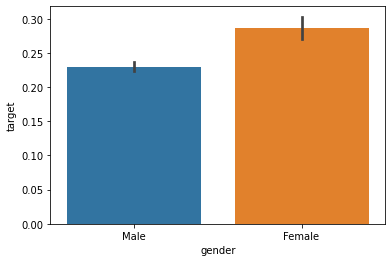

In [51]:
sns.barplot(x="gender", y="target", data=df)
plt.show()
# Mayor porcentaje de mujeres estan buscando un nuevo trabajo-

0.0    0.759933
1.0    0.240067
Name: target, dtype: float64


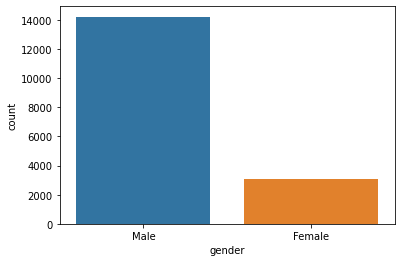

In [52]:
# Visualizar variable Gender.# el 75 % de la plantilla es másculina.
sns.countplot(x=df['gender']);
print(df.target.value_counts(normalize=True))

In [53]:
# Binarizamos male y female feature.
df['Sex_bin'] = df['gender']
df = df.replace({'Sex_bin': {'Male': 0, 'Female': 1}})
df.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Sex_bin
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0


### Relevent_experience: experiencia relevante del candidato.


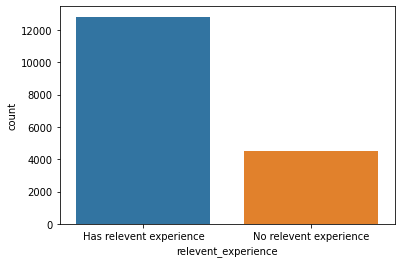

In [54]:
sns.countplot(x=df.relevent_experience)# podemos comprobar que la gran mayoria de los candidatos poseen experiencia relevante.

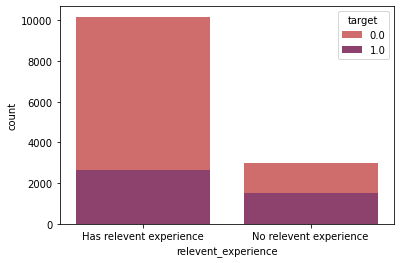

In [55]:
# la mayoria de personas que tiene experiencia , NO  buscan un trabajo nuevo.
sns.countplot(x=df.relevent_experience, hue=df.target, palette='flare', dodge=False) # dodge me permite apilar

In [56]:
pd.crosstab(df['relevent_experience'], df['gender'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)# tenemos las columnas en tanto por ciento.
# Podemos ver que en 75 % de los hombres tiene experiencia relevante frente a un 25%.
# y la diferencia para las mujeres es menor, un 20% menos. La diferencia de la experiencia relevante  entre las mujeres esta mas homogeneizada.


gender,Female,Male
relevent_experience,,
Has relevent experience,67.681347,75.428732
No relevent experience,32.318653,24.571268


In [57]:
# Binarizamos Relevent_ experience
df['relev_exp_bin'] = df['relevent_experience']
df = df.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})


### Education Level: nivel de educación del candidato.


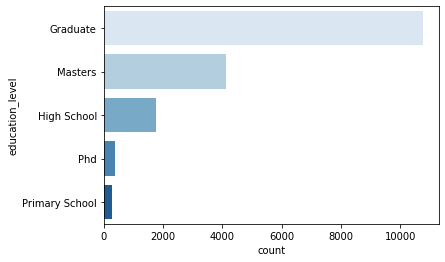

In [58]:
sns.countplot(y= df['education_level'], palette="Blues") # Comprobamos que el mayor número de trabajadores son poseen un Grado Universitario.

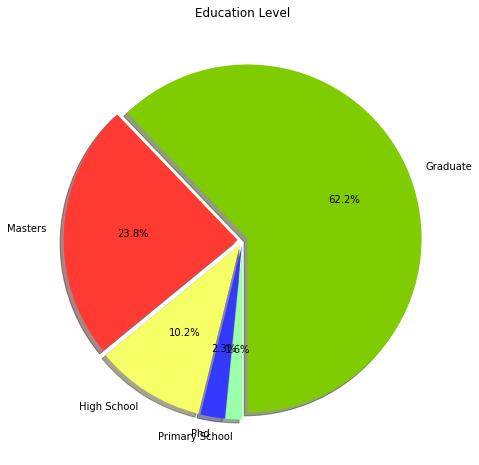

In [59]:
# Visualizamos el gráfico de una forma diferente.
labels = list(df["education_level"].value_counts().index)
values = list(df["education_level"].value_counts().values)

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%",
        colors=["#7fcc00", "#ff3a33", "#f7ff66", "#3339ff", "#99ffa9"],
        shadow=True, explode = [0.03, 0.03, 0.03, 0.03, 0.03],
        startangle=270)
plt.title("Education Level");

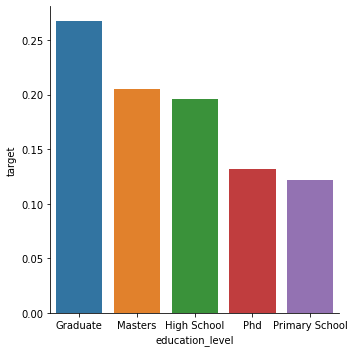

In [60]:
sns.catplot(x="education_level", y="target", data=df, kind="bar", ci=None)
# el mayor numero de personas buscando un nuevo empleo son Graduadas.

### Enrolled_university: tipo de curso universitario inscrito, si lo hubiera.


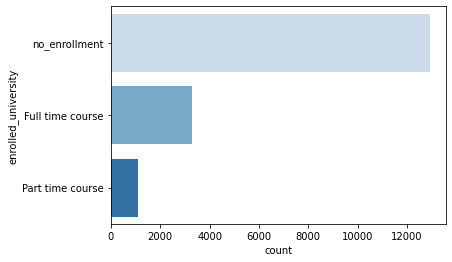

In [61]:
sns.countplot(y= df['enrolled_university'], palette="Blues") # Comprobamos esta variable.

In [62]:
# no le encuentro sentido a esta variable, ya que el mayor numero de empleados era graduados y aqui aparece  como no apuntandos a la universidad, asi que elimino esta columna.
df.drop(['enrolled_university'],axis=1,inplace=True) 


### Major discipline: disciplina principal de educación del candidato.


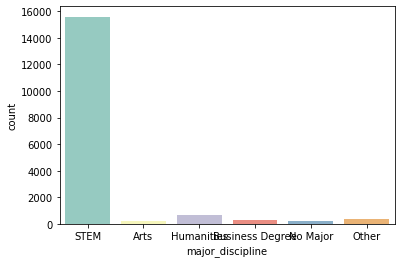

In [63]:
sns.countplot(x=df.major_discipline, palette="Set3")

In [64]:
# Mayor discipline_ STEM; SCIENCE.
pd.crosstab(index=df["major_discipline"],
                        columns=df["target"], margins=True)


target,0.0,1.0,All
major_discipline,,,
Arts,190,47,237
Business Degree,229,76,305
Humanities,511,123,634
No Major,157,50,207
Other,260,84,344
STEM,11812,3777,15589
All,13159,4157,17316


In [65]:
pd.crosstab(df['major_discipline'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos las columnas en tanto por ciento


target,0.0,1.0
major_discipline,,
Arts,1.443879,1.130623
Business Degree,1.740254,1.828242
Humanities,3.883274,2.958865
No Major,1.193100,1.202790
Other,1.975834,2.020688
STEM,89.763660,90.858792


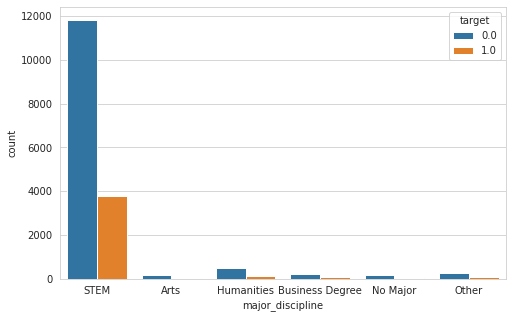

In [66]:
# Mayor discipline_ Visualizamos comparando esta variable con el objetivo.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df)

### Experience: Experiencia total del candidato en años.



In [67]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [68]:
# Convertimos la columna de 'experience' en valores númericos.
df["experience"] = pd.to_numeric(df["experience"])

In [69]:
df["experience"].dtypes

dtype('int64')

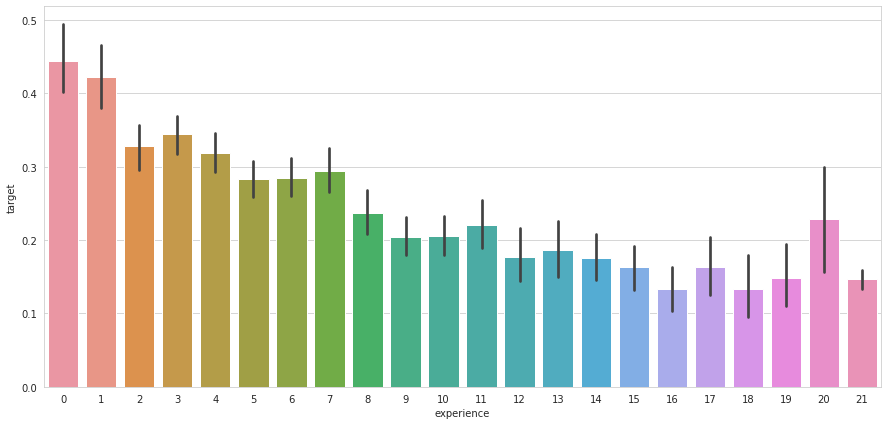

In [70]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="experience", y="target", data=df)

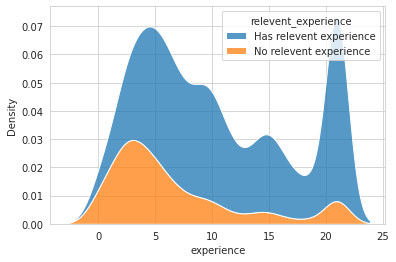

In [71]:
sns.kdeplot(data=df, x="experience", hue="relevent_experience", multiple="stack")


In [72]:
# Realizamos la discretización del atributo Experience con pd.cut y bins / labels a medida
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df['años_experiencia'] = pd.cut(df["experience"], bins=bins, labels=labels)

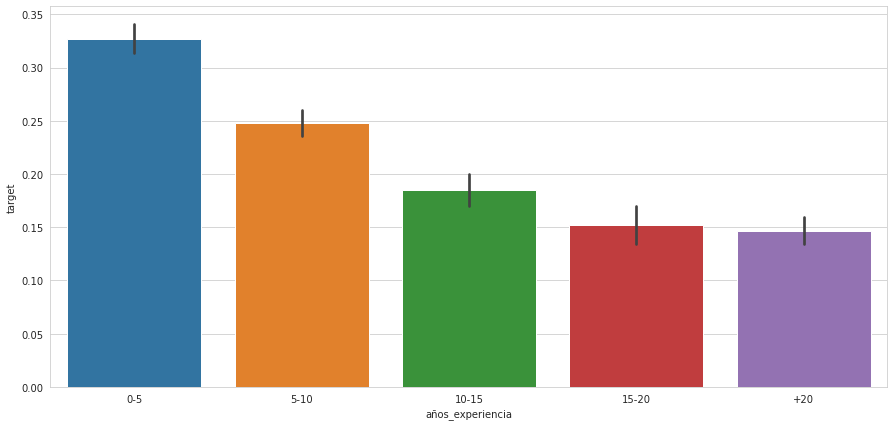

In [73]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="años_experiencia", y="target", data=df)

### Company Type:  tipo de empleador actual.



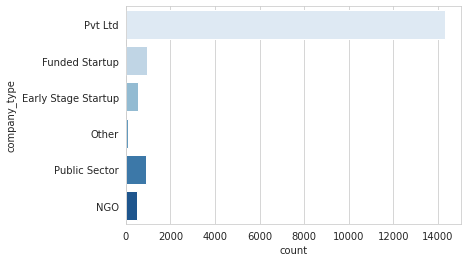

In [74]:
sns.countplot(y= df['company_type'], palette="Blues") # invertimos el eje
# Sociedad de responsabilidad limitada (Private limited company)


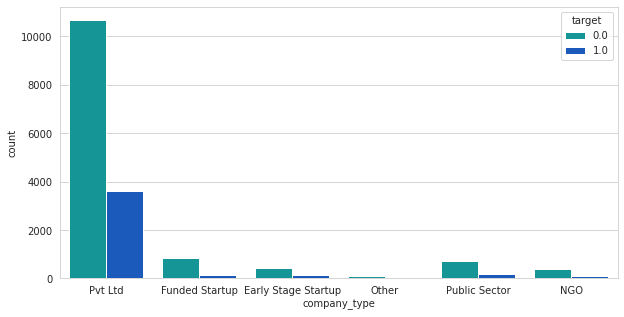

In [75]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=df,palette='winter_r')

In [76]:
df.groupby(['company_type']).count()

,city_development_index,gender,relevent_experience,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,Sex_bin,relev_exp_bin,años_experiencia
company_type,,,,,,,,,,,,,
Early Stage Startup,558,558,558,558,558,558,558,558,558,558,558,558,539
Funded Startup,962,962,962,962,962,962,962,962,962,962,962,962,953
NGO,494,494,494,494,494,494,494,494,494,494,494,494,477
Other,112,112,112,112,112,112,112,112,112,112,112,112,110
Public Sector,889,889,889,889,889,889,889,889,889,889,889,889,877
Pvt Ltd,14301,14301,14301,14301,14301,14301,14301,14301,14301,14301,14301,14301,13937


In [77]:
# Unimos las variable StarUp
df['company_type'] = df['company_type'].replace({
"Early Stage Startup":"Startup",
"Funded Startup":"Startup",})

### company_size: Número de empleados en la empresa del empleador actual.


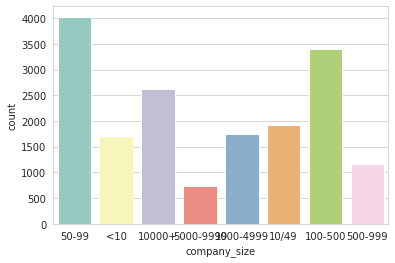

In [78]:
sns.countplot(x=df.company_size, palette="Set3")

In [79]:
pd.crosstab(df['company_size'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)# tenemos las columnas en tanto por ciento


target,0.0,1.0
company_size,,
10/49,10.441523,13.230695
100-500,19.864731,18.931922
1000-4999,10.456722,8.972817
10000+,15.130329,15.179216
50-99,23.132457,23.622805
500-999,6.771031,6.422901
5000-9999,4.194848,4.354102
<10,10.008359,9.285542


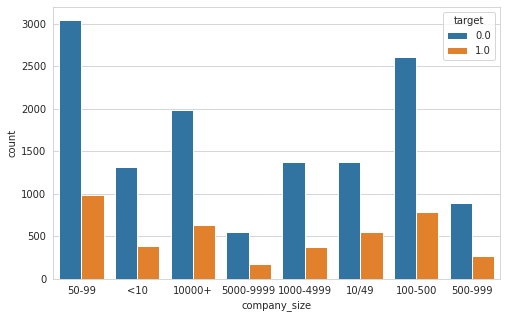

In [80]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

In [81]:
# discretizamos esta variable para reducir valores en :grande , mediana y pequeña empresa.

In [82]:
# reemplazo los valores de esta variable, en vez de por intervalo por 
df['company_size'] = df.company_size.replace({'50-99':"Mediana",
"<10":"Pequeña",
"10000+":"Gran_empresa",
"5000-9999": "Gran_empresa",
"1000-4999":"Gran_empresa",
"10/49":"Pequeña",
"100-500":"Mediana",
"500-999":"Gran_empresa"})


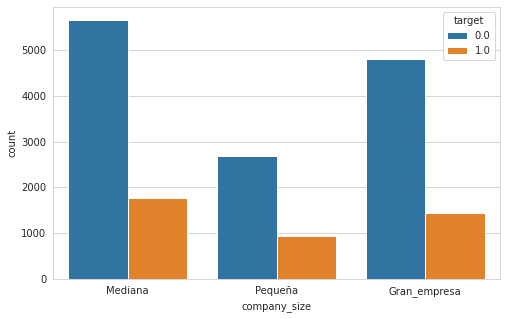

In [83]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

### Last new job: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.


In [84]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [85]:
# Convertimos la columna de 'experience' en valores númericos.
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

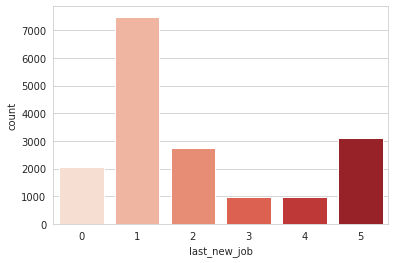

In [86]:
sns.countplot(x=df.last_new_job, palette="Reds")
# comprobamos que el mayor numero de candidatos, tenian un año de experiencia en su puesto de trabajo anterior.

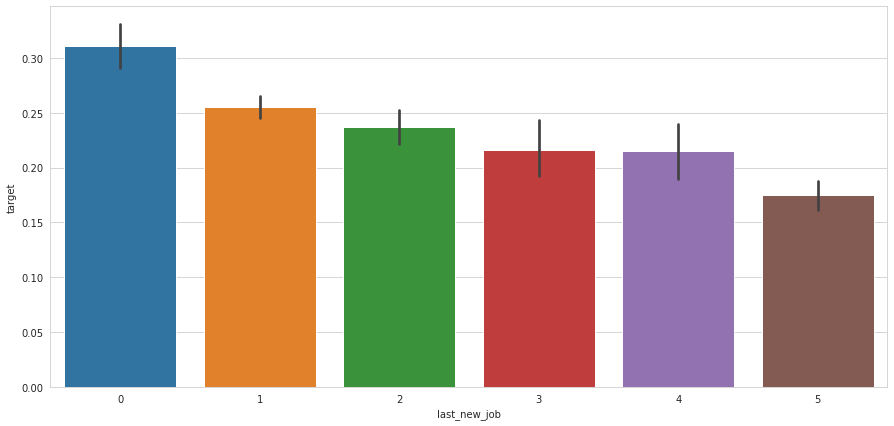

In [87]:
plt.figure(figsize= [15.0, 7.0])# en esta gráfica podemos observar como el porcentaje de personas que buscan un nuevo empleo se va reduciendo conforme tiene mas años en su puesto de trabajo.
sns.barplot(x="last_new_job", y="target", data=df)

### Training hours: horas de formación completadas.


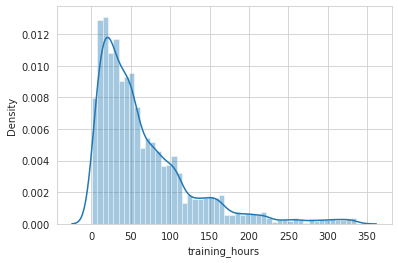

In [88]:
sns.distplot(df.training_hours);
# Visualizamos esta variable , podemos comprobar que el mayor numero de formación , se encuentra entre 0 y 50 horas completadas.

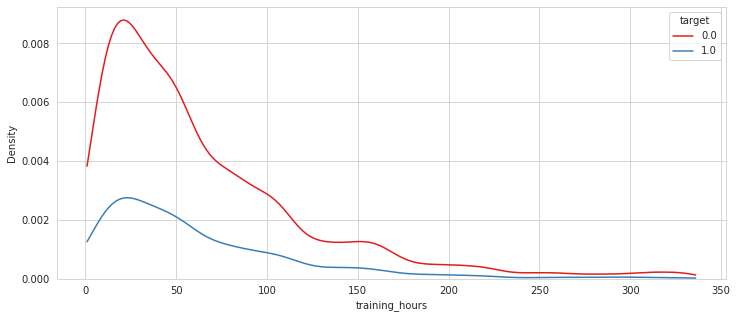

In [89]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='Set1')
# Aquí podemos ver que solo a unos pocos empleados se les ha ofrecido una capacitación de más de 100 horas.


# **Pre-Modelling**

In [90]:
# Eliminamos columnas ya discretizadas, y para no  repetirlas.
df.drop(['gender'], axis=1,inplace=True)
df.drop(['relevent_experience'], axis=1,inplace=True)
df.drop(['experience'], axis=1,inplace=True)


**Abajo**....... **DUDA**
He eliminado las columnas de major discipline and company type porque creo que no aportan mucha información. Por ejemplo , en major discipline mas del 90% de los candidatos ahn estudiado STEM. ¿ hago bien en excluir esta variable o deberia dejarla?.

In [91]:
# Eliminamos columnas con poco valor. muy desbalanceadas.
# pruebo con varios modelos para ver cual me da mejor resultado.

# df.drop(['major_discipline'], axis=1,inplace=True)
# df.drop(['company_type'],axis=1,inplace=True)


Estandarización y binarización de variables categóricas.

In [92]:
# data estandarizacion
from sklearn import preprocessing
cols_to_standarize = ['training_hours','last_new_job']
for col in cols_to_standarize:
  df[col] = preprocessing.scale(df[col], axis=0, copy=False)

In [93]:
# get dummies
categorical_feature = (df.dtypes == "category") | (df.dtypes == object)
categorical_cols = df.columns[categorical_feature].tolist()
df = pd.get_dummies(df, columns=categorical_cols)

Observamos las variables mas correlacionadas con el target.

In [94]:
# correlacion 
correlation_matrix = df.corr()

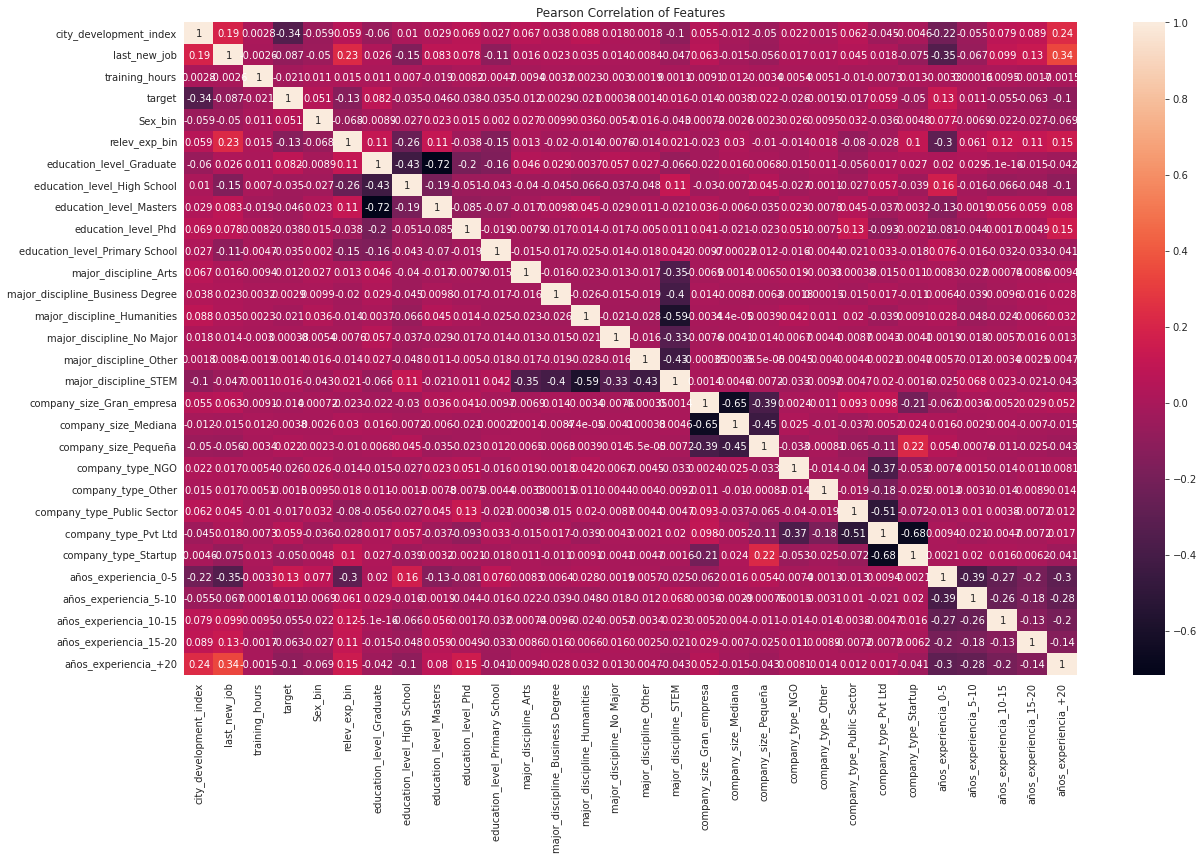

In [95]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [96]:
# Mostrar las 5 features con mejor coeficiente de correlación
corr = df.corr()
print(corr['target'].sort_values(ascending=False)[:6], '\n')
print(corr['target'].sort_values(ascending=False)[-6:])

target                      1.000000
años_experiencia_0-5        0.130835
education_level_Graduate    0.082498
company_type_Pvt Ltd        0.059473
Sex_bin                     0.050747
company_size_Pequeña        0.021689
Name: target, dtype: float64 

años_experiencia_10-15   -0.054914
años_experiencia_15-20   -0.063013
last_new_job             -0.087480
años_experiencia_+20     -0.101162
relev_exp_bin            -0.133283
city_development_index   -0.344397
Name: target, dtype: float64


### Selecionamos las mejores variables con el método **SelectKBest**.

In [97]:
# hago una copia , para despues hacer otra versión de los modelos.
df1=df

In [98]:
# Realizamos el train_test_split 80-20
X = df.drop(['target'], axis = 1)
y = df['target']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [100]:
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(X, y)
scores = sorted(zip(map(lambda x: round(x, 4), selector.scores_), X.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'target']).head(50)

,Score,target
0,2329.9519,city_development_index
1,313.1352,relev_exp_bin
2,301.5374,años_experiencia_0-5
3,179.0188,años_experiencia_+20
4,133.5214,last_new_job
5,118.6461,education_level_Graduate
6,69.0223,años_experiencia_15-20
7,61.4578,company_type_Pvt Ltd
8,52.3689,años_experiencia_10-15
9,44.7033,Sex_bin


# **1- Modelling**
(sin oversampling)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=13)

### 1.1 Cross validation:

 Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. ... That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting.

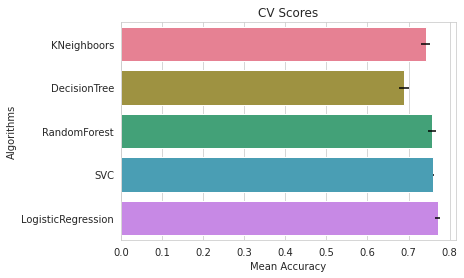

In [102]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 17

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))

for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors", 
                     "DecisionTree",   
                     "RandomForest",
                     "SVC",                    
                     "LogisticRegression"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

## 1.2. K-nearest neighbors.

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.



In [103]:
# entrenamos este modelo.
model = KNeighborsClassifier(3).fit(X_train, y_train)
predicted_knn = model.predict(X_test)

* Confidence Score: A Confidence Score is a number between 0 and 1 that represents the likelihood that the output of a Machine Learning model is correct and will satisfy a user’s request.
Each prediction has a Confidence Score. The higher the score, the more confident the ML is that the prediction will satisfy the user’s request.

**DUDA**¿ simplemente me tengo que elegir el mejor algoritmo por este confidence score o tengo que tener en cuenta alguna otra puntuación más? Tengo claro el concepto de overfitting/underfitting pero no sé detectarlos.**texto en negrita**

In [104]:
# Confidence score
knn_score= round(model.score(X_train,y_train) * 100, 2)
print("Confidence score is :" ,knn_score)
print(classification_report(y_test, predicted_knn))

Confidence score is : 84.07
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84      2637
         1.0       0.42      0.27      0.33       827

    accuracy                           0.74      3464
   macro avg       0.61      0.58      0.58      3464
weighted avg       0.71      0.74      0.72      3464



* Accuracy (exactitud): La exactitud es una métrica que nos indica cómo de preciso es un modelo de Machine Learning a la hora de hacer predicciones.

Formalmente, se define como el ratio entre las predicciones correctas respecto
al número total de ejemplos. Cuanto más alta sea la exactitud, es decir más
cercano a 1, más acertará nuestro modelo y, por lo tanto, será más preciso.
Fijarnos solo en la exactitud no es suficiente y puede ser engañoso en ocasiones.

Existen otras métricas que podemos observar a la hora de evaluar cómo
de bueno es un modelo, por ejemplo el Recall, la F1 score o la curva de ROC.

Una manera de aumentar la precisión de un modelo puede ser aumentar el
número de datos de entrenamiento.

* Recall or sensity: Recall literally is how many of the true positives were recalled (fouund).
The ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

*  Precision: The ability of a classification model to identify only the relevant data points. Precision refers to the number of true positives divided by the total number of positive predictions.

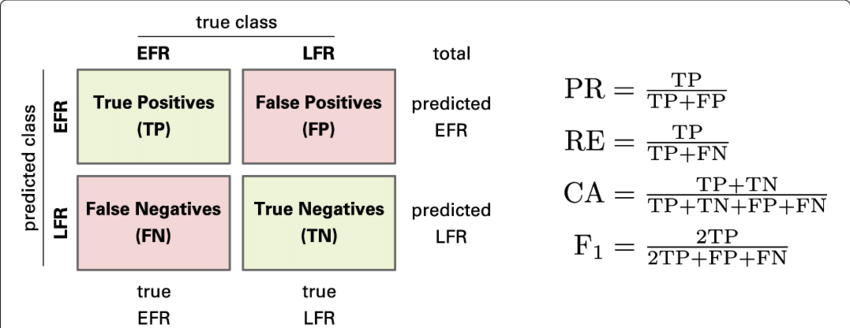

    * Si disminuimos el valor del umbral, obtenemos más valores negativos, aumentando la sensibilidad y dsiminuyedo la especificidad.
    * en cambio, si aumentamos el umbral, obtenemos más valores negativos, lo que aumenta la especificidad , disminuye la sensibilidad.

* F1 score: is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

The F-score, also called the F1-score, is a measure of a model's accuracy on a dataset. ... The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.

A **Confusion matrix** is an N x N matrix used for evaluating the performance of a classification model.
* The columns represent the actual values of the target variable
* The rows represent the predicted values of the target variable. TRUE POSITIVE, número de aciertos.


In [105]:
KNN_Model= KNeighborsClassifier()


In [106]:
# KNN - default
KNN_Model= KNeighborsClassifier()

scores=cross_val_score(KNN_Model, X_train, y_train, cv=K_fold,
                       n_jobs=4, scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.74386724 0.75974026 0.74801444 0.73574007 0.7234657  0.73140794
 0.75884477 0.73718412 0.74223827 0.73429603]


74.15

In [107]:
### KNN classifier - parameter tuning
from sklearn.model_selection import GridSearchCV
KNNM = KNeighborsClassifier()
knn_param_grid = {
                  'n_neighbors': [3,5,11,19], 
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']
                  }

gsKNN = GridSearchCV(KNNM, param_grid = knn_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsKNN.fit(X_train, y_train)

KNNM_best = gsKNN.best_estimator_

# Best score
gsKNN.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


0.7634984710435975

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

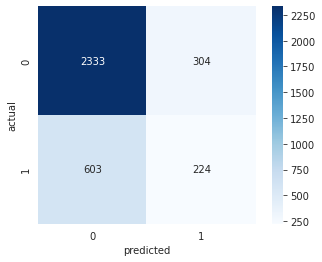

In [108]:
 # Graficamos la matriz de confusión.
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [109]:
# Create a performance_auc dict
performance_auc = {}

* Curva Roc: Nos dice qué tan bueno puede distinguir el modelo entre dos cosas. Mejores modelos pueden distinguir con precisión entre los dos, mientras que un modelo pobre tendrá dificultades para distinguir entre los dos.
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition the area under the ROC curve gives an idea about the benefit of using the test(s) in question.

* AUC: The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. 

Es el area bajo la curva ROC: Una situación ideal es cuando la curva ROC es igual a 1, es decir, cuando las dos curvas no se superponen en absoluto.
Lo conveniente es que AUC sea superior a 0,7.

La peor situación es cuando AUC es igual a 0.5, es decir,el modelo no tiene capacidad para distinguir entre clase positiva y clase negativa.
Cuando AUC es aproximadamente 0, el modelo en realidad está correspondiendo las clases. Significa que el modelo predice la clase negativa como positiva y viceversa.

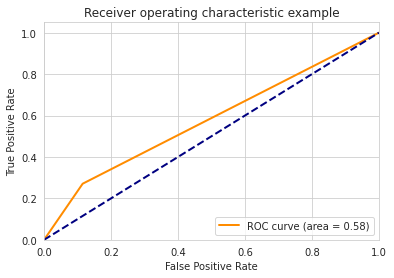

In [110]:
 # Graficamos la ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 1.3 Support Vector Machines


In [111]:
# Entrenamiento SVC
model = SVC(probability=True).fit(X_train, y_train)
predicted_sv = model.predict(X_test)

In [112]:
# Confidence score
svm_score_2 = round(model.score(X_train, y_train) * 100, 2)
print(svm_score_2)
print(classification_report(y_test, predicted_sv))

76.13
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87      2637
         1.0       0.83      0.02      0.04       827

    accuracy                           0.76      3464
   macro avg       0.80      0.51      0.45      3464
weighted avg       0.78      0.76      0.67      3464



In [115]:
# Support Vector Machine
SVM_Model= SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, cv=K_fold, 
                    n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.76118326 0.75974026 0.75956679 0.76173285 0.76173285 0.7631769
 0.75956679 0.75956679 0.76101083 0.75740072]


76.05

In [ ]:
### SVC classifier - parameter tuning
# HAY OTRO UN POCO MAS ABAJO, PERO IGUAL, TARDA MUCHO TIEMPO Y NO SÉ BIEN COMO INTERPRETAR LOS DATOS.
SVMC = SVC(probability=True)
svc_param_grid = {
                  'C':[1,10],
                   'gamma':[1,0.1],
                   'kernel':['linear','rbf'],
                   'degree':[2],
                  'shrinking':[True,], 
                'probability':[True,],
                        'tol': [0.001,],
                'cache_size':[200,]
                  }
                  
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 2)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

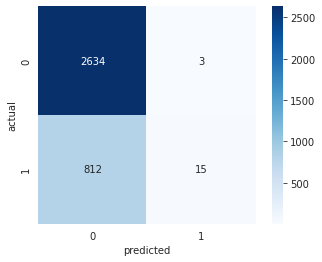

In [117]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

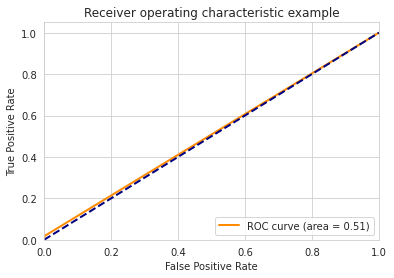

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from    https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ 

In [119]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
 
# print prediction results
svm_score = round(model.score(X_train, y_train) * 100, 2)
print(svm_score)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

76.13
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87      2637
         1.0       0.83      0.02      0.04       827

    accuracy                           0.76      3464
   macro avg       0.80      0.51      0.45      3464
weighted avg       0.78      0.76      0.67      3464



In [120]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {   'C':[1,10],
                   'gamma':[1,0.1],
                   'kernel':['linear','rbf'],
                   #'degree':[2],
                  #'shrinking':[True,], 
                #'probability':[True,],
                        #'tol': [0.001,],
                #'cache_size':[200,]
                  }
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.760 total time=   3.9s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.760 total time=   4.2s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.760 total time=   4.3s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.760 total time=   4.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.760 total time=   4.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.768 total time=  10.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time=   9.9s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.756 total time=  10.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=  10.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.754 total time=  10.2s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.760 total time=   3.9s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [121]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [122]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      2637
         1.0       0.63      0.16      0.26       827

    accuracy                           0.78      3464
   macro avg       0.71      0.57      0.57      3464
weighted avg       0.75      0.78      0.72      3464



### 1.4 Logistic Regression Model

In [123]:
model = LogisticRegression().fit(X_train, y_train)
model.score(X_train, y_train)


0.7725960150158822

In [124]:
model.score(X_test, y_test)


0.7817551963048499

In [125]:
predicted_log = model.predict(X_test)


In [126]:
# Confidence score aplicado al y_test
logreg_score_2 = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score_2)

print(classification_report(y_test, predicted_log))

77.26
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      2637
         1.0       0.62      0.22      0.33       827

    accuracy                           0.78      3464
   macro avg       0.71      0.59      0.60      3464
weighted avg       0.75      0.78      0.74      3464



In [127]:
# Logistic Regression - default
lr_Model = LogisticRegression()

scores = cross_val_score(lr_Model, X_train, y_train,
                         cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.78138528 0.76984127 0.76895307 0.77111913 0.76245487 0.77039711
 0.77833935 0.76967509 0.7631769  0.77111913]


77.06

In [128]:
####    TARDA MUCHISIMO TIEMPO Y NO SALE NADA.
# Logistic Regression - parameters tuning
lr_Model = LogisticRegression()

# Creamos el Search Grid para el ajuste de los parámetros
lr_param_grid = {
              'penalty': ['l1', 'l2'],
              #'tol':[0.0001, 0.0002, 0.0003],
              #'max_iter':[100, 200, 300],
              'C': [0.01, 0.1, 1, 10, 100],
              #'intercept_scaling': [1, 2, 3, 4],
              #'solver': ['liblinear'],
              #'verbose': [1]
              }

# Crear el GridSearch Cross Validator
gsLRM = GridSearchCV(lr_Model, param_grid=lr_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

# ajustamos
gsLRM.fit(X_train, y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.7713679862055314

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

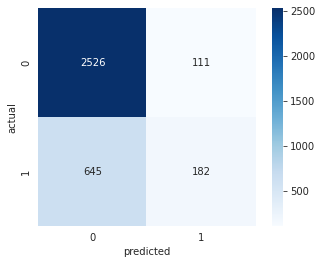

In [129]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

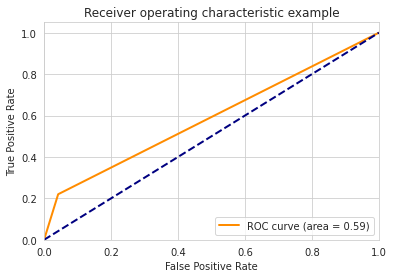

In [130]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 1.5 Decission Tree

In [131]:
# train model
model = DecisionTreeClassifier().fit(X_train, y_train)
predicted_dt = model.predict(X_test)

In [132]:
# Confidence score
dectree_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score_2)
print(classification_report(y_test, predicted_dt))

99.16
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2637
         1.0       0.38      0.39      0.38       827

    accuracy                           0.70      3464
   macro avg       0.59      0.59      0.59      3464
weighted avg       0.70      0.70      0.70      3464



In [133]:
# Decission Tree by defautl
tree_model=  DecisionTreeClassifier().fit(X_train, y_train)

scores=cross_val_score(tree_model, X_train, y_train, cv=K_fold,
                       n_jobs=4, scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)


[0.68037518 0.68398268 0.68808664 0.6801444  0.68880866 0.69097473
 0.69747292 0.70397112 0.68375451 0.70108303]


68.99

In [134]:
# DecisionTree Classifier — Working on Dataset using GridSearchCV to find best hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree= DecisionTreeClassifier()

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4]}

# Crear el GridSearch Cross Validator
gsTree = GridSearchCV(tree, param_grid=params, cv=K_fold,
                     scoring='accuracy', n_jobs=3, verbose=1)

# ajustamos
gsTree.fit(X_train, y_train)
tree_best = gsTree.best_estimator_

# Best score
gsTree.best_score_


Fitting 10 folds for each of 294 candidates, totalling 2940 fits


0.7878279963117508

**DUDA**: Creo que aqui tengo overfitting.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

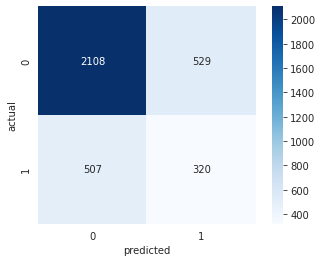

In [135]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

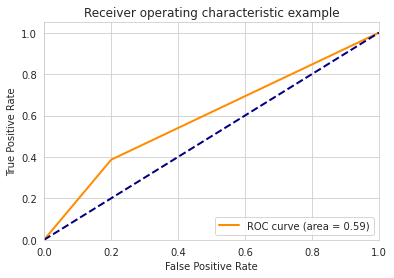

In [136]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 1.6 Random forest.

In [137]:
# entrenamos el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=13).fit(X_train, y_train)
predicted_rf = model.predict(X_test)

In [138]:
# Confidence score
randfor_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(randfor_score_2)
print(classification_report(y_test, predicted_rf))

75.96
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      2637
         1.0       0.00      0.00      0.00       827

    accuracy                           0.76      3464
   macro avg       0.38      0.50      0.43      3464
weighted avg       0.58      0.76      0.66      3464



In [139]:
# Random Forest Classifier Model - default
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.76767677 0.76551227 0.76173285 0.74368231 0.73574007 0.74440433
 0.76173285 0.74873646 0.75306859 0.75740072]


75.4

In [140]:
 # RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              #"min_samples_split": [2, 6, 20],
              #"min_samples_leaf": [1, 4, 16],
              "n_estimators" :[200,700],
              #"criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

SyntaxError: ignored

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

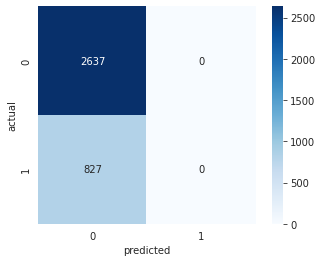

In [141]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

#**1. 7 Conclusión**

In [142]:
# lOGISTIC rEGRESSION  parece que es el mejor modelo.

In [143]:
# Creamos el modelo VotingPredictor
# 
VotingPredictor = VotingClassifier(estimators =
                           [('knn',KNNM_best),
                            ('svc', SVMC_best),
                            ('lrm', LRM_best),
                            ('tree', tree_best),
                            #('rfc', RFC_best)],
                           voting='soft', n_jobs = 4)

# Utilizamos el mejor resultado en nuestro modelo
VotingPredictor = VotingPredictor.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor, X_train, y_train, cv=K_fold,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

SyntaxError: ignored

# **2- Segunda version del Modelo con Oversampling**

In [144]:
# dataset df1

### **Oversampling**

Con oversampling solo noto mejoria en el primer algortimo KNN antes del  tuning, los demas se quedan igual.

In [146]:
# Realizamos el train_test_split 80-20
X = df1.drop('target', axis=1)
y = df1['target']

In [147]:
#Importamos los paquetes de sobremuestreo
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE()

#Generación de nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X,y)

#Representación
dataSmote

,city_development_index,last_new_job,training_hours,Sex_bin,relev_exp_bin,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_Gran_empresa,company_size_Mediana,company_size_Pequeña,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup,años_experiencia_0-5,años_experiencia_5-10,años_experiencia_10-15,años_experiencia_15-20,años_experiencia_+20
0,0.920000,-0.620454,-0.491123,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0.776000,1.770905,-0.308328,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0.624000,-1.218294,0.289910,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0.767000,1.173066,-0.956419,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0.764000,-0.620454,-0.690535,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26313,0.624000,-0.620454,-0.585204,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
26314,0.584709,-0.620454,1.617422,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
26315,0.614514,-0.620454,2.515414,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
26316,0.748284,1.519886,0.627590,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=13)

2.1 Cross validation

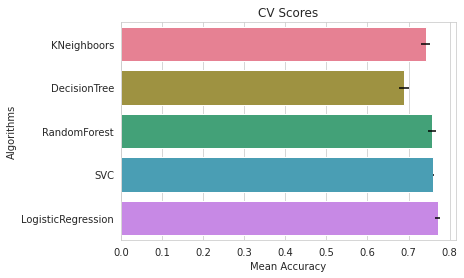

In [149]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 17

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))

for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors", 
                     "DecisionTree",   
                     "RandomForest",
                     "SVC",                    
                     "LogisticRegression"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

 ### 2.2 K-Nearest Neighbors.

In [150]:
# entrenamos este modelo.
model = KNeighborsClassifier(3).fit(X_train, y_train)
predicted_knn = model.predict(X_test)

In [151]:
# Confidence score
knn_score= round(model.score(X_train,y_train) * 100, 2)
print("Confidence score is :" ,knn_score)
print(classification_report(y_test, predicted_knn))

Confidence score is : 84.07
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84      2637
         1.0       0.42      0.27      0.33       827

    accuracy                           0.74      3464
   macro avg       0.61      0.58      0.58      3464
weighted avg       0.71      0.74      0.72      3464



In [152]:
# KNN - default
KNN_Model= KNeighborsClassifier()

scores=cross_val_score(KNN_Model, X_train, y_train, cv=K_fold,
                       n_jobs=4, scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)

[0.74386724 0.75974026 0.74801444 0.73574007 0.7234657  0.73140794
 0.75884477 0.73718412 0.74223827 0.73429603]


74.15

In [153]:
### KNN classifier - parameter tuning
from sklearn.model_selection import GridSearchCV
KNNM = KNeighborsClassifier()
knn_param_grid = {
                  'n_neighbors': [3,5,11,19], 
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']
                  }

gsKNN = GridSearchCV(KNNM, param_grid = knn_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsKNN.fit(X_train, y_train)

KNNM_best = gsKNN.best_estimator_

# Best score
gsKNN.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


0.7634984710435975

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

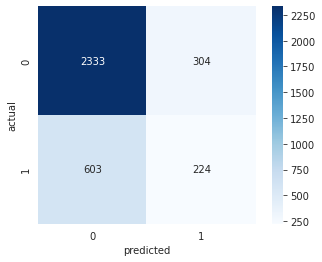

In [154]:
 # Graficamos la matriz de confusión.
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [155]:
# Create a performance_auc dict
performance_auc = {}

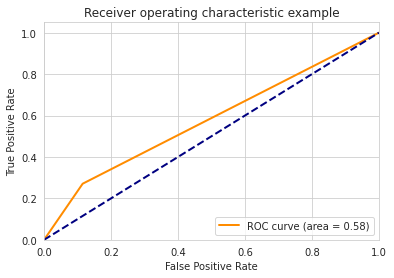

In [156]:
 # Graficamos la ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.3 Support Vector Machines.

In [157]:
# Entrenamiento SVC
model = SVC(probability=True).fit(X_train, y_train)
predicted_sv = model.predict(X_test)

In [158]:
# Confidence score
svm_score_2 = round(model.score(X_train, y_train) * 100, 2)
print(svm_score_2)
print(classification_report(y_test, predicted_sv))

76.13
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87      2637
         1.0       0.83      0.02      0.04       827

    accuracy                           0.76      3464
   macro avg       0.80      0.51      0.45      3464
weighted avg       0.78      0.76      0.67      3464



In [159]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.76118326 0.75974026 0.75956679 0.76173285 0.76173285 0.7631769
 0.75956679 0.75956679 0.76101083 0.75740072]


76.05

In [160]:
### SVC classifier - parameter tuning
SVMC = SVC(probability=True)
svc_param_grid = {
                  'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]
                  }

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


KeyboardInterrupt: ignored

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

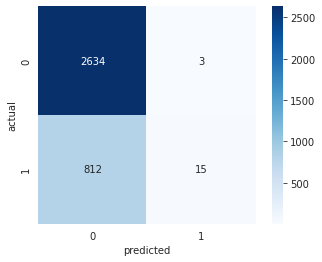

In [161]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

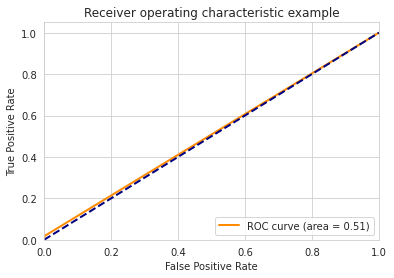

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.4 Logistic Regression Model.

In [163]:
model = LogisticRegression().fit(X_train, y_train)
model.score(X_train, y_train)


0.7725960150158822

In [165]:
model.score(X_test, y_test)


0.7817551963048499

In [166]:
predicted_log = model.predict(X_test)


In [167]:
# Confidence score aplicado al y_test
logreg_score_2 = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score_2)

print(classification_report(y_test, predicted_log))

77.26
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      2637
         1.0       0.62      0.22      0.33       827

    accuracy                           0.78      3464
   macro avg       0.71      0.59      0.60      3464
weighted avg       0.75      0.78      0.74      3464



In [168]:
# Logistic Regression - default
lr_Model = LogisticRegression()

scores = cross_val_score(lr_Model, X_train, y_train,
                         cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.78138528 0.76984127 0.76895307 0.77111913 0.76245487 0.77039711
 0.77833935 0.76967509 0.7631769  0.77111913]


77.06

In [169]:
# Logistic Regression - parameters tuning
lr_Model = LogisticRegression()

# Creamos el Search Grid para el ajuste de los parámetros
lr_param_grid = {
              'penalty': ['l1', 'l2'],
              'tol':[0.0001, 0.0002, 0.0003],
              'max_iter':[100, 200, 300],
              'C': [0.01, 0.1, 1, 10, 100],
              'intercept_scaling': [1, 2, 3, 4],
              'solver': ['liblinear'],
              'verbose': [1]
              }

# Crear el GridSearch Cross Validator
gsLRM = GridSearchCV(lr_Model, param_grid=lr_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

# ajustamos
gsLRM.fit(X_train, y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


KeyboardInterrupt: ignored

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

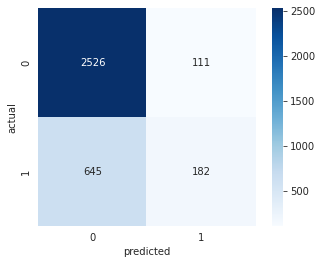

In [170]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

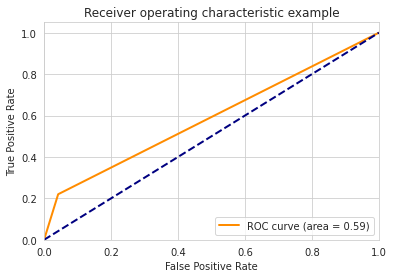

In [171]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.5.  Decission Tree

In [173]:
# train model
model = DecisionTreeClassifier().fit(X_train, y_train)
predicted_dt = model.predict(X_test)

In [174]:
# Confidence score
dectree_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score_2)
print(classification_report(y_test, predicted_dt))

99.16
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2637
         1.0       0.37      0.39      0.38       827

    accuracy                           0.70      3464
   macro avg       0.59      0.59      0.59      3464
weighted avg       0.70      0.70      0.70      3464



In [175]:
# Decission Tree by defautl
tree_model=  DecisionTreeClassifier().fit(X_train, y_train)

scores=cross_val_score(tree_model, X_train, y_train, cv=K_fold,
                       n_jobs=4, scoring='accuracy')
print(scores)
round(np.mean(scores)*100,2)


[0.68037518 0.68181818 0.6866426  0.67725632 0.68736462 0.68158845
 0.70036101 0.70108303 0.68880866 0.70180505]


68.87

In [176]:
# DecisionTree Classifier — Working on Dataset using GridSearchCV to find best hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

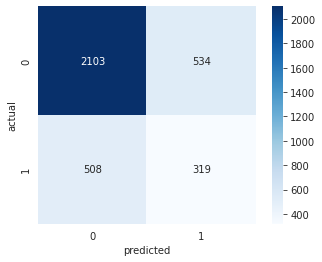

In [177]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

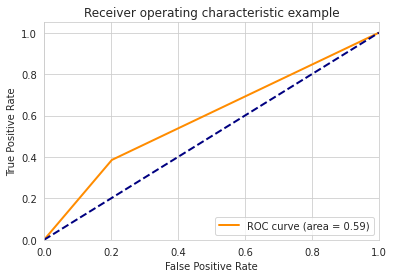

In [178]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### 2.6. Random Forest

In [179]:
# entrenamos el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=13).fit(X_train, y_train)
predicted_rf = model.predict(X_test)

In [180]:
# Confidence score
randfor_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(randfor_score_2)
print(classification_report(y_test, predicted_rf))

75.96
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      2637
         1.0       0.00      0.00      0.00       827

    accuracy                           0.76      3464
   macro avg       0.38      0.50      0.43      3464
weighted avg       0.58      0.76      0.66      3464



In [181]:
# Random Forest Classifier Model - default
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.76118326 0.76190476 0.76245487 0.73718412 0.74512635 0.74223827
 0.75595668 0.74151625 0.75595668 0.75379061]


75.17

In [182]:
 # RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100, 200, 300, 400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


KeyboardInterrupt: ignored

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

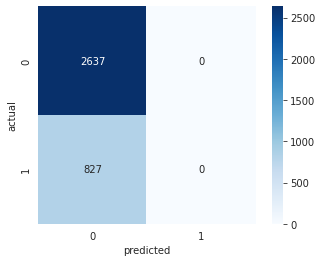

In [183]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

### 2.7. Conclusion 

In [185]:
# Creamos el modelo VotingPredictor
# 
VotingPredictor = VotingClassifier(estimators =
                           [('knn',KNNM_best),
                            #('svc', SVMC_best),
                            #('lrm', LRM_best),
                            ('tree', tree_best),
                            #('rfc', RFC_best)],
                           voting='soft', n_jobs = 4)

# Utilizamos el mejor resultado en nuestro modelo
VotingPredictor = VotingPredictor.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor, X_train, y_train, cv=K_fold,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

SyntaxError: ignored